## 　　　　　　　　　　　　French Covid-19 Data Analysis
##### 　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　(part Q2, Q4, Q6, Q8, and Q10)

### Introduction

In this project, we will explore COVID-19 data. We use France as an example to explore their epidemic development trends based on their confirmed cases, death cases and other data, and the relationship between mobility and the this trend. We use Python as the main launage of this project, and use matplotlib and seaborn to do visulization.

### Packages/Raw files import

In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt

In [2]:
os.chdir('/Users/berupupper/Desktop/Math/project')

In [5]:
world = pd.read_csv('owid-covid-data.csv')
mobility = pd.read_csv('Mobility.csv')
hdi = pd.read_csv('Human Development Index (HDI).csv')
life = pd.read_csv('Life expectancy Index.csv')
recovery = pd.read_csv('covid19_recovered_global.csv')

### Data Preview/Preprocessing

    After the original data import, we need to preview each data set to see which features they each contained.

In [5]:
world.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-01-23,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-24,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-25,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-26,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-27,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [6]:
mobility.head()

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2020-11-29,2020-11-30,2020-12-01,2020-12-02,2020-12-03,2020-12-04,2020-12-05,2020-12-06,2020-12-07,2020-12-08
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,...,120.86,105.74,97.80,94.97,96.89,104.39,120.74,119.19,106.02,106.75
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,...,118.89,126.35,123.88,126.48,106.48,130.41,122.69,115.31,127.33,135.44
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,...,55.07,65.72,70.89,72.47,84.38,107.65,117.89,84.13,83.34,67.81
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,...,37.25,54.21,61.57,58.88,68.62,81.35,80.38,54.10,57.58,46.92
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,...,98.94,100.90,105.52,108.80,120.13,116.43,96.47,102.24,104.67,110.48


In [7]:
hdi.head()

,HDI Rank,Country,1990,Unnamed: 3,1991,Unnamed: 5,1992,Unnamed: 7,1993,Unnamed: 9,...,2014,Unnamed: 51,2015,Unnamed: 53,2016,Unnamed: 55,2017,Unnamed: 57,2018,Unnamed: 59
0,Human Development Index (HDI)\nnull\nDimension...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,170,Afghanistan,0.298,NaN,0.304,NaN,0.312,NaN,0.308,NaN,...,0.488,NaN,0.490,NaN,0.491,NaN,0.493,NaN,0.496,NaN
2,69,Albania,0.644,NaN,0.625,NaN,0.608,NaN,0.611,NaN,...,0.787,NaN,0.788,NaN,0.788,NaN,0.789,NaN,0.791,NaN
3,82,Algeria,0.578,NaN,0.582,NaN,0.589,NaN,0.593,NaN,...,0.749,NaN,0.751,NaN,0.755,NaN,0.758,NaN,0.759,NaN
4,36,Andorra,..,NaN,..,NaN,..,NaN,..,NaN,...,0.853,NaN,0.850,NaN,0.854,NaN,0.852,NaN,0.857,NaN


In [43]:
life.head()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,Life expectancy Index
HDI Rank (2018),Country,1990,NaN,1991,NaN,1992,NaN,1993,NaN,1994,NaN,1995,NaN,1996,NaN,1997,NaN,1998,NaN,1999,NaN,2000,NaN,2001,NaN,2002,NaN,2003,NaN,2004,NaN,2005,NaN,2006,NaN,2007,NaN,2008,NaN,2009,NaN,2010,NaN,2011,NaN,2012,NaN,2013,NaN,2014,NaN,2015,NaN,2016,NaN,2017,NaN,2018,NaN
170,Afghanistan,0.467,NaN,0.477,NaN,0.487,NaN,0.496,NaN,0.505,NaN,0.514,NaN,0.522,NaN,0.530,NaN,0.537,NaN,0.544,NaN,0.551,NaN,0.559,NaN,0.566,NaN,0.573,NaN,0.581,NaN,0.589,NaN,0.597,NaN,0.606,NaN,0.614,NaN,0.623,NaN,0.631,NaN,0.639,NaN,0.647,NaN,0.654,NaN,0.661,NaN,0.667,NaN,0.673,NaN,0.679,NaN,0.684,NaN
69,Albania,0.797,NaN,0.797,NaN,0.797,NaN,0.798,NaN,0.800,NaN,0.803,NaN,0.808,NaN,0.813,NaN,0.819,NaN,0.824,NaN,0.830,NaN,0.835,NaN,0.840,NaN,0.844,NaN,0.847,NaN,0.850,NaN,0.853,NaN,0.856,NaN,0.860,NaN,0.865,NaN,0.870,NaN,0.876,NaN,0.881,NaN,0.885,NaN,0.889,NaN,0.893,NaN,0.895,NaN,0.897,NaN,0.899,NaN
82,Algeria,0.722,NaN,0.727,NaN,0.732,NaN,0.737,NaN,0.741,NaN,0.747,NaN,0.753,NaN,0.759,NaN,0.765,NaN,0.772,NaN,0.779,NaN,0.786,NaN,0.794,NaN,0.802,NaN,0.809,NaN,0.817,NaN,0.823,NaN,0.830,NaN,0.836,NaN,0.841,NaN,0.845,NaN,0.849,NaN,0.853,NaN,0.856,NaN,0.860,NaN,0.863,NaN,0.866,NaN,0.869,NaN,0.872,NaN
36,Andorra,0.870,NaN,0.872,NaN,0.875,NaN,0.877,NaN,0.880,NaN,0.883,NaN,0.887,NaN,0.891,NaN,0.896,NaN,0.900,NaN,0.906,NaN,0.911,NaN,0.915,NaN,0.920,NaN,0.923,NaN,0.926,NaN,0.928,NaN,0.930,NaN,0.932,NaN,0.934,NaN,0.936,NaN,0.937,NaN,0.939,NaN,0.941,NaN,0.943,NaN,0.945,NaN,0.947,NaN,0.949,NaN,0.951,NaN


In [44]:
recovery.head()

,Province/State,Country/Region,Lat,Long,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2020-12-03,2020-12-04,2020-12-05,2020-12-06,2020-12-07,2020-12-08,2020-12-09,2020-12-10,2020-12-11,2020-12-12
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,37260,37260,37393,37685,37879,37920,38032,38099,38141,38200
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,20484,20974,21286,21617,22180,22527,23072,23609,24136,24520
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,55538,56079,56617,57146,57648,58146,58146,59135,59590,60028
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,6066,6130,6171,6238,6293,6367,6452,6505,6598,6629
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,8244,8299,8335,8338,8353,8470,8579,8679,8798,8841


By previewing the first five rows of each datasets, we can see that all of the three datasets contain data from the whole country. Therefore, the first step is to extract the data of our target country France from March to November. Then, for HDI and LIFE dataset, there are many NaN and Unnamed columns which don't contain any data and we should get rid of them.

In [6]:
#Filter France data from March to Nov.
fr_covid = world.loc[(world['location'] == 'France') & (world['date']>= '2020-03-01') & (world['date']< '2020-12-01')]

fr_mobility = mobility.loc[(mobility['region'] == 'France')]
date_start = fr_mobility.columns.get_loc('2020-03-01')
date_end = fr_mobility.columns.get_loc('2020-12-01')
fr_mobility = fr_mobility.iloc[:,np.r_[1:3, date_start:date_end]]

fr_recovery = recovery.loc[(recovery['Country/Region'] == 'France')]
date_start1 = fr_recovery.columns.get_loc('2020-03-01')
date_end1 = fr_recovery.columns.get_loc('2020-12-01')
fr_recovery = fr_recovery.iloc[:,np.r_[1:3, date_start:date_end]]

# Get rid of all NaN columns
hdi = hdi.dropna(axis = 1,how = 'all')
life = life.dropna(axis = 1, how = 'all')
fr_recovery = fr_recovery.dropna(axis = 1, how = 'all')

### Analysis and Visulization

In this section, we will take a deeper look at the datasets and perform analysis and visulization through multiple indicators.

            #2. Test per Confirmed Case Over Time for France

Text(0.5, 1.0, 'Test per Confirmed Case Over Time for France')

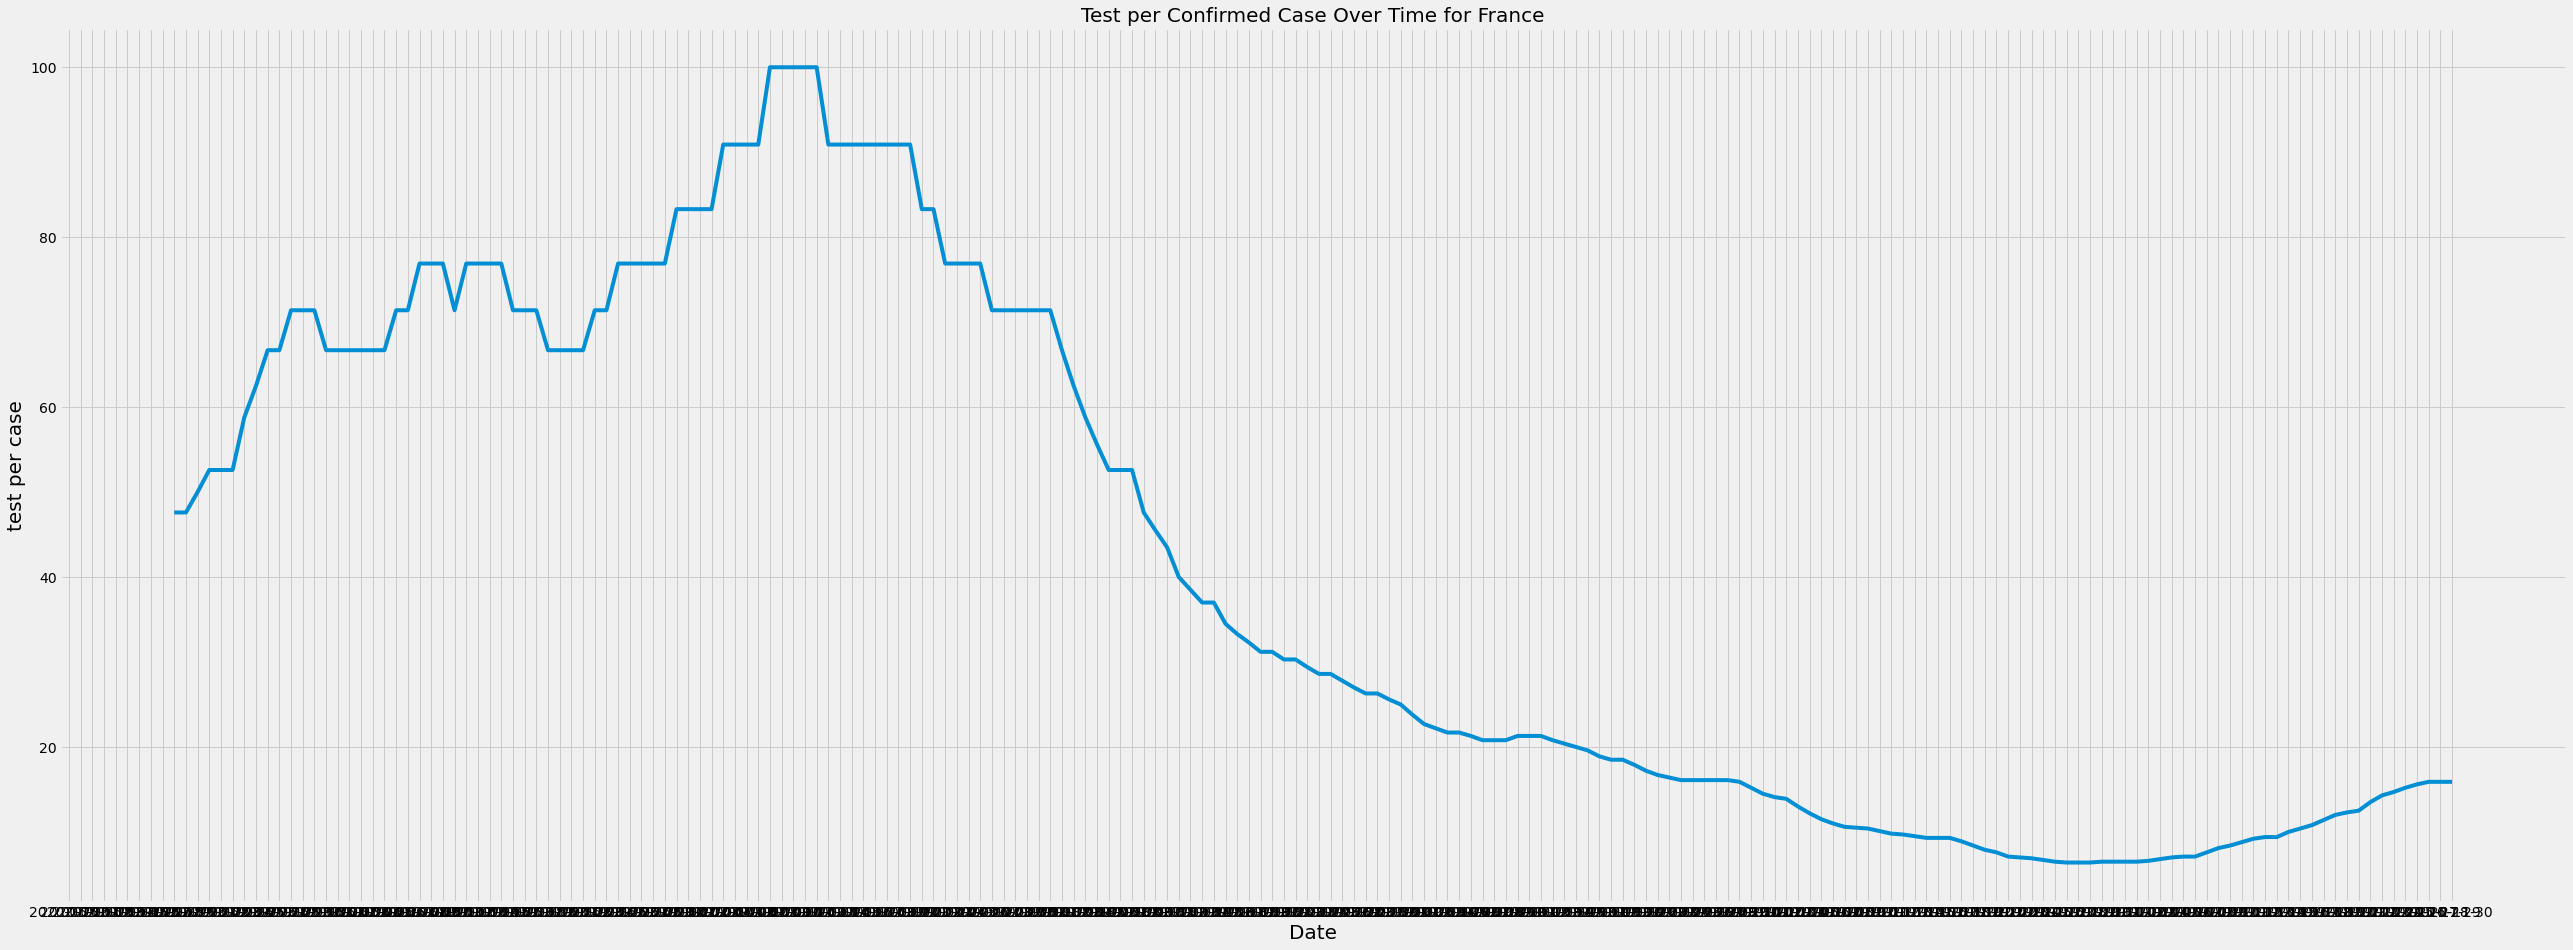

In [10]:
q2 = fr_covid.loc[:,['date','tests_per_case']]

plt.style.use('fivethirtyeight')
plt.figure(figsize=(40,15))
plt.plot(q2['date'],q2['tests_per_case'])
plt.xlabel('Date',size = 20)
plt.ylabel('test per case',size = 20)
plt.title('Test per Confirmed Case Over Time for France', size = 20)

Test per confirmed cases cans how how the cases change. The lower the value, the more cases confirmed. 

From the line chart above we can see, from March to Novmeber, the speed for new cases was slowly decreasing then quickly increasing recently. But since there are too many date points, we can not see x-axis well. Therefore, we added a 'month' column which will show the monthly data.

Text(0.5, 1.0, 'Test per Confirmed Case Over Time for France')

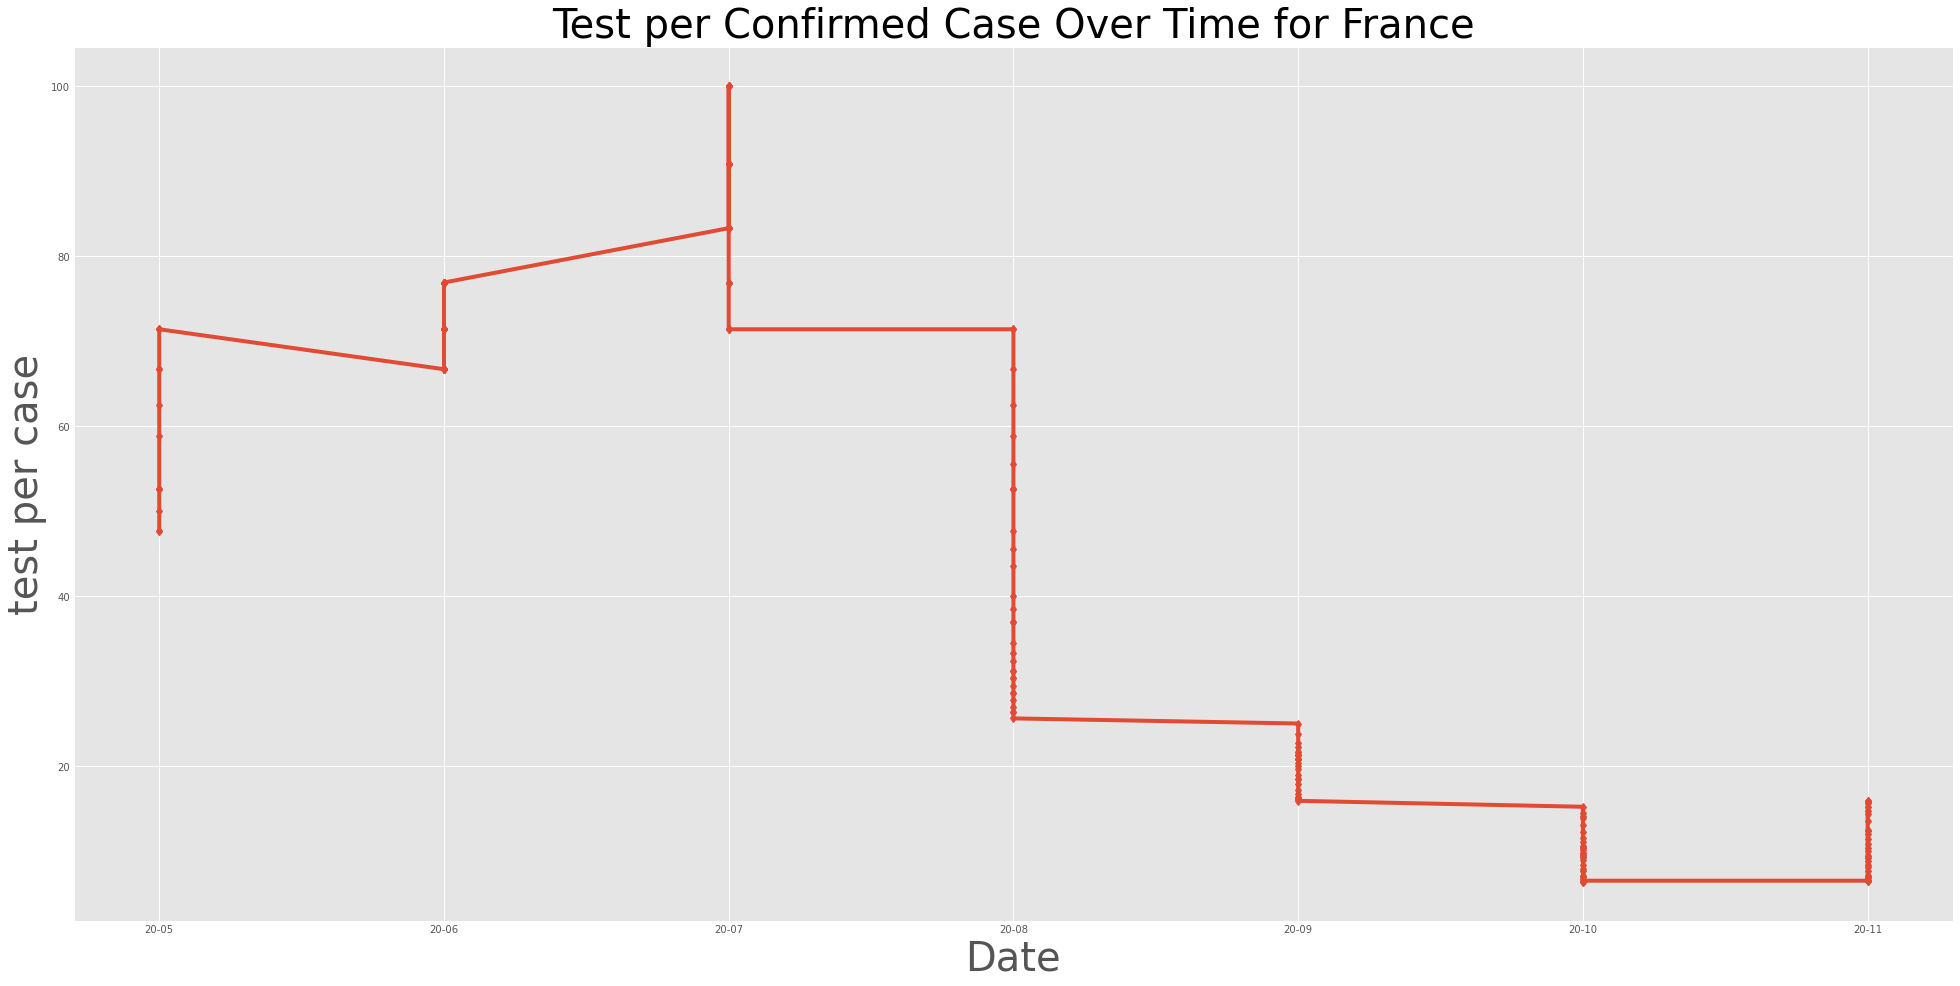

In [22]:
q2['month'] = pd.to_datetime(q2['date']).dt.strftime('%y-%m') #added month column

plt.figure(figsize=(30,15))
plt.plot(q2['month'],q2['tests_per_case'],marker = 'd')
plt.xlabel('Date',size = 40)
plt.ylabel('test per case',size = 40)
plt.title('Test per Confirmed Case Over Time for France', size = 40)

Date can be seen much clearer this time. We marked each day's value with a diamond. 

We can see starting from August, the test per cases value is decreasing. In this time France has more cases confirmed. 

            #4. Rate of Recovered Cases Over Time for France

In [61]:
fr_totalcases = fr_covid.loc[:,['date','total_cases']] #get date and total cases info
fr_rec = pd.melt(fr_recovery,id_vars=['Country/Region'], var_name = 'date',value_name ='recovery cases') #transform format

q4 = fr_totalcases.join(fr_rec.set_index('date'), on = 'date') #join them 
q4 = q4.drop(columns=['Country/Region'])
q4['Recovery Rate'] = q4['recovery cases'] / q4['total_cases'] * 100
q4['week'] = pd.to_datetime(q4['date']).dt.strftime('%U') #added month column
q4 = q4.fillna(0)
q4.head()

,date,total_cases,recovery cases,Recovery Rate,week
19360,2020-03-01,130.0,0.0,0.0,09
19361,2020-03-02,191.0,0.0,0.0,09
19362,2020-03-03,204.0,0.0,0.0,09
19363,2020-03-04,288.0,0.0,0.0,09
19364,2020-03-05,380.0,0.0,0.0,09


Text(0.5, 1.0, 'Rate of Recovered Cases by week for France')

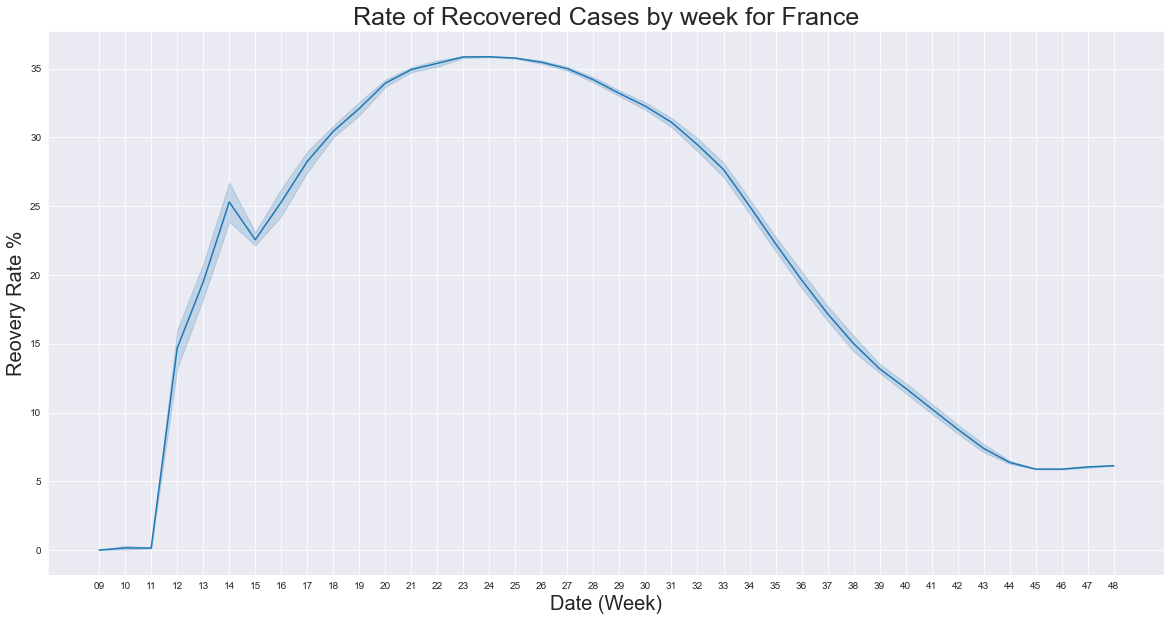

In [64]:
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
sns.lineplot(data=q4, x='week', y='Recovery Rate')
plt.xlabel('Date (Week)', size=20)
plt.ylabel('Reovery Rate %', size = 20)
plt.title('Rate of Recovered Cases by week for France', size=25)

Basically, the recovery rate shows in the form of a parabola, rising first, and then falling. In the beginning, because the epidemic just broke out, people knew nothing about it, few people recovered. Later, as people became more aware of the virus, doctors had more effective ways to treat patients, so the recovery rate rose. After June, the recovery rate gradually declined because the patients with milder illnesses were discharged from the hospital, and the rest were those with severe illnesses. Another reason was that the increase in confirmed cases exceeded the number of recovered patients.

            #6. Mobility Vs Transmission Rate (Reproduction rate) Over Time for France

In [7]:
fr_tran = fr_covid.loc[:,['date','reproduction_rate']]
fr_tran = fr_tran.set_index('date')
fr_mob = pd.melt(fr_mobility, id_vars=['region','transportation_type'],
                var_name = 'date', value_name = '')  #to covert date columns to rows
fr_mob = fr_mob.set_index(['date','region','transportation_type'],
                          drop = True).unstack('transportation_type').reset_index('date')  #to make different transportation type different columns

q6 = fr_tran.join(fr_mob.set_index('date'), on = 'date') #combine the two subsets using "date" column
q6.head()

,reproduction_rate,"(, driving)","(, transit)","(, walking)"
date,,,,
2020-03-01,2.57,87.03,100.53,61.23
2020-03-02,2.57,90.07,104.69,73.50
2020-03-03,2.57,92.79,106.87,83.57
2020-03-04,2.58,95.13,109.26,82.79
2020-03-05,2.58,95.60,111.99,83.03


Text(0.5, 1.0, 'Mobility Vs Transmission Rate (Reproduction rate) Over Time for France)')

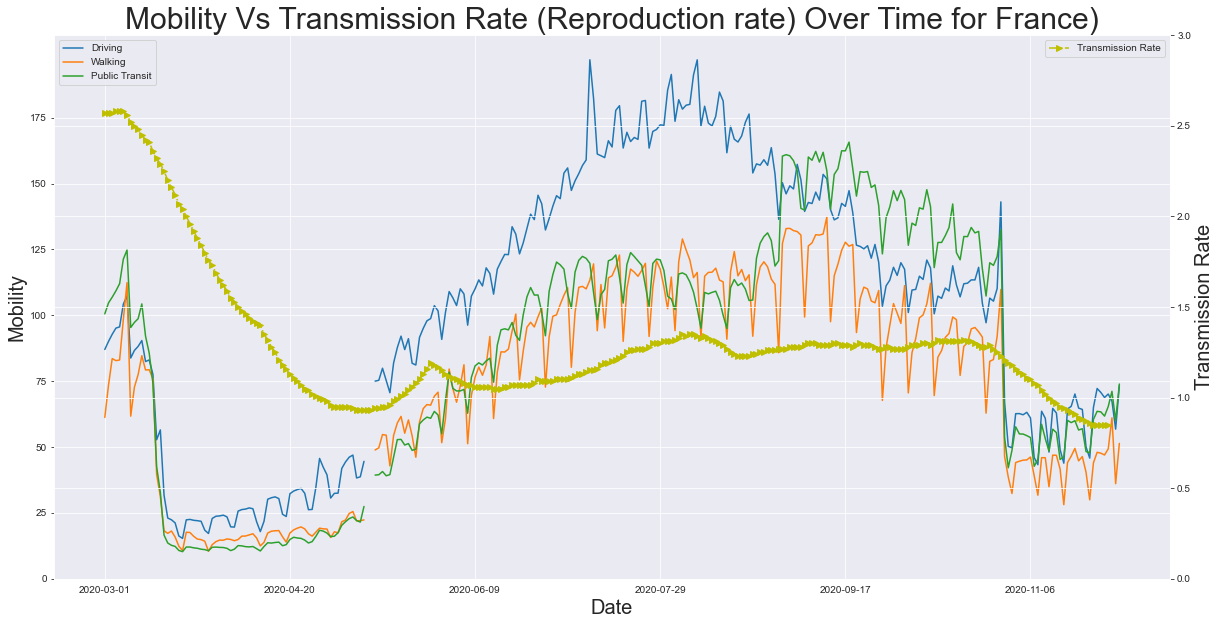

In [9]:

#plot
sns.set_style('darkgrid')
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111) 
q6[ ('', 'driving')].plot(ax=ax1,label='Driving')
q6[ ('', 'walking')].plot(ax=ax1,label='Walking')
q6[ ('', 'transit')].plot(ax=ax1,label='Public Transit')
plt.xlabel('Date',size=20)             
ax1.set_yticks(np.arange(0,200,25))
ax1.set_ylabel('Mobility',size=20)                
plt.legend(loc=2)

ax2 = ax1.twinx()  #add the second y-axis
q6['reproduction_rate'].plot(ax=ax2,grid=True, style='y>-.',label='Transmission Rate')
ax2.set_yticks(np.arange(0,3.5,0.5)) 
ax2.set_ylabel('Transmission Rate',size=20)    
plt.legend(loc=1)     
plt.title('Mobility Vs Transmission Rate (Reproduction rate) Over Time for France)',size=30)


The way people go out, the frequency they are going out, and the virus's transmission rate are related. Since March, we can see that when the virus had first broken out, the transmission rate was very high. As people began to stay at home, the ratio of the three modes of transportation has gradually declined, and the transmission rate has also fallen. In May, the French 'stay-home' order gradually opened up, and people's travel increased. At this time, people mainly went out by driving because it is safer. The transmission rate of the virus at this time has also begun to maintain at a stable level. The reasons were that people have begun to wear masks and maintain social distancing. At the end of October, the next wave has come, and people returned to their homes to strengthen protection, so travel mobility and transmission rates dropped again.

            #8. HDI of All Countries Vs Their Current Transmission Rates

Text(0.5, 1.0, 'HDI of All Countries Vs Their Current Transmission Rates by continent')

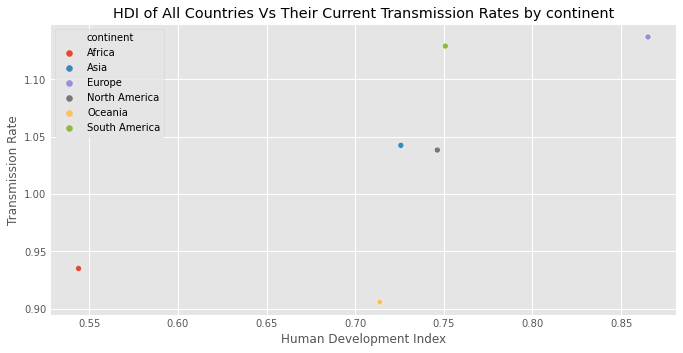

In [34]:
q8= world.loc[:,['continent','date','human_development_index','reproduction_rate']] #get needed columns
q8.loc[q8['date'] == '2020-11-30'] #using 11/30/2020 as current date
q8 = q8.groupby(['continent']).mean()  #using average data of every continent

plt.figure(figsize=(10,5))
sns.scatterplot(data=q8, x='human_development_index', y='reproduction_rate',hue='continent')
plt.xlabel('Human Development Index')
plt.ylabel('Transmission Rate')
plt.title('HDI of All Countries Vs Their Current Transmission Rates by continent')

Are there any relationships between the contries human development index and their COVID transmission rate?
In this figure we use the average values of each continent to research this question. The result shows that the higher the HDI, the higher their transmission rate. Generally, countries with high HDI are more livable, residents have richer lives, and go out and interact with each other more. This may cause a high virus transmission rate.

            #10. Life Expectancy Vs Current Death Rate of All Countries

Text(0.5, 1.0, 'Life Expectancy Vs Current Death Rate of All Countries as of 11/30/2020')

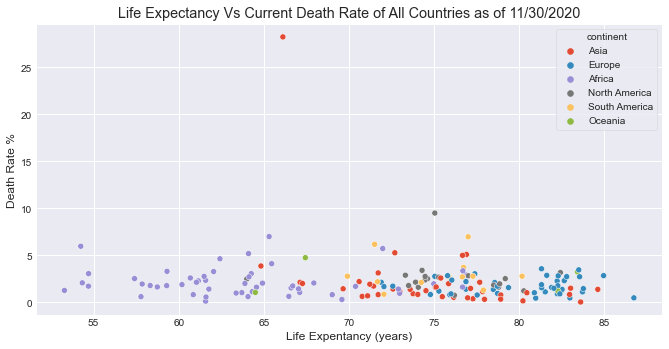

In [35]:
world['Death Rate'] = world['total_deaths'] / world['total_cases'] * 100  #add calculated death rate column
q10= world.loc[:,['location','continent','date','life_expectancy','Death Rate']] #get needed columns
q10 = q10.loc[q10['date'] == '2020-11-30'] #using 11/30/2020 as current date
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.scatterplot(data=q10, x='life_expectancy', y='Death Rate',hue='continent')
plt.xlabel('Life Expentancy (years)')
plt.ylabel('Death Rate %')
plt.title('Life Expectancy Vs Current Death Rate of All Countries as of 11/30/2020')

This chart shows the Life Expectancy Vs Current Death Rate of All Countries, as the date of November 30th. Countries in the same continent are represented by the same color. 
From the image we can see that on average, Europe countries have the highest life expectancy, while Afirca has the lowest. As for the death rate, most countries' death rate are under 5%, like 1-4%. However, we can see one country with the extremely high death rate 28.25% is Yemen.

### Lessons Learned and Conclusion

In this project we studied the COVID data, using Frence as an example. The epidemic in France has phases. The outbreak began in March, with confirmed cases and transmission rates increasing rapidly. As the government issued a stay-at-home order, people began to go out less, mobility data declined, and infection rates and mortality rates also gradually decreased. Around May, to restore the economy, restrictions were gradually relaxed, and more people went out. Because more people wear masks, maintain social distancing, and the transmission rate remains stable. In October, with the advent of winter, the next wave of epidemics came, people once again reduced going out, strengthened protection, and the infection rate was brought under control.

Visualization can help us better understand data and gain more insights. Matplotlib and seaborn are strong tools for visualizing data. If there are too many values, it's a good choice to adjust the scale of the axis.